# Real-Time MNIST Digit Classification

## By: Mustafa Yildirim

Importing Libraries

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Processing the Data

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [23]:
unique = np.unique(y_train)
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [24]:
indices = [np.where(y_train == digit)[0][0] for digit in unique]
indices

[1, 3, 5, 7, 2, 0, 13, 15, 17, 4]

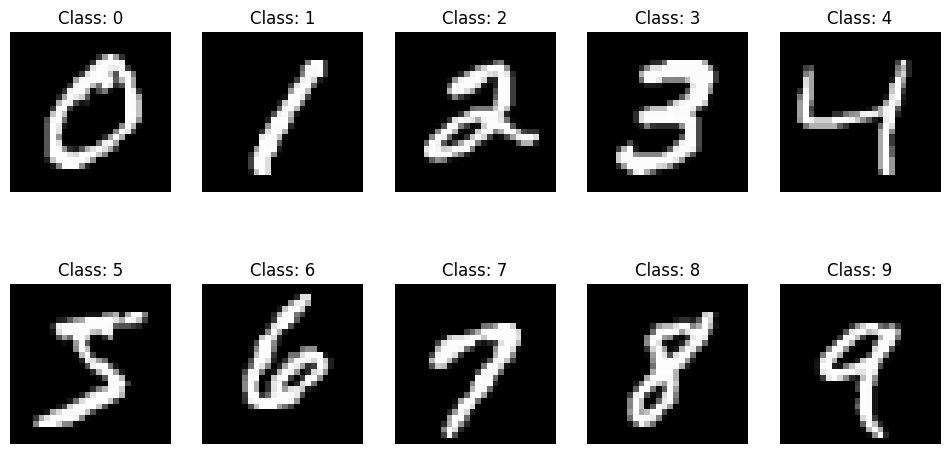

In [25]:
plt.figure(figsize=(12, 6))

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f'Class: {y_train[idx]}')
    plt.axis('off')
plt.show()

In [ ]:
def data_process(x):
    x = x/255.0
    x = x.reshape(-1, 28, 28, 1)
    return x

In [ ]:
x_train = data_process(x_train)
x_test = data_process(x_test)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [26]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

Initializing the Model

In [7]:
CNNmodel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    
])

C:\Users\yldrm\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
CNNmodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
CNNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training

In [10]:
History = CNNmodel.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8628 - loss: 0.4295
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9730 - loss: 0.0902
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9806 - loss: 0.0664
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9831 - loss: 0.0569
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9879 - loss: 0.0387
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9882 - loss: 0.0367
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9898 - loss: 0.0329
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9908 - loss: 0.0310
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9908 - loss: 0.0288


In [11]:
train_acc, train_loss = History.history['accuracy'], History.history['loss']

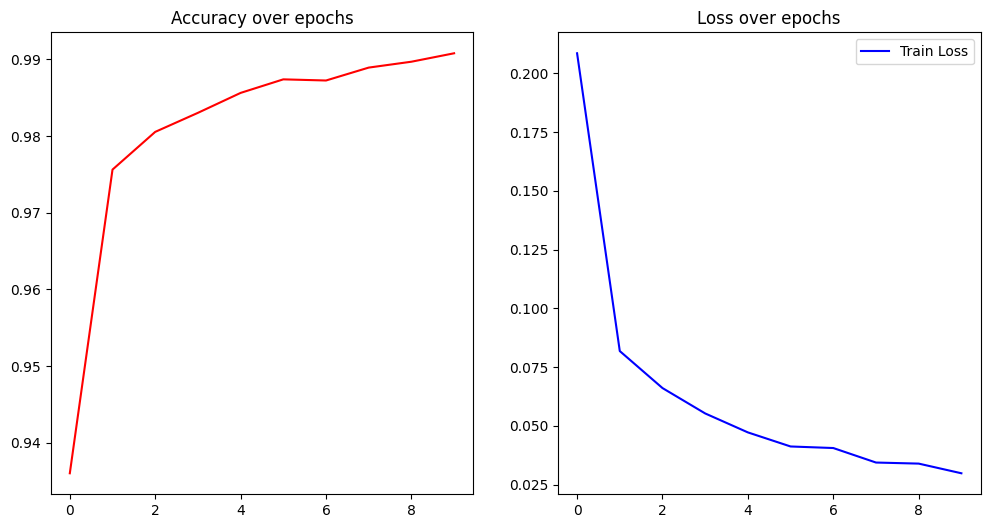

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Accuracy over epochs')
plt.plot(train_acc, label='Train Accuracy', color='red')

plt.subplot(1, 2, 2)
plt.title('Loss over epochs')
plt.plot(train_loss, label='Train Loss', color='blue')

plt.legend()
plt.show()

Testing

In [13]:
test_loss, test_acc = CNNmodel.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0290


Canvas that allows for real-time digit classification

In [15]:
canvas = np.zeros((400, 400), dtype=np.uint8)
drawing = False

def draw(event, x, y, flags, param):
    global drawing
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing:
            cv.circle(canvas, (x, y), 5, (255, 255, 255), -1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False

In [16]:
cap = cv.VideoCapture(0)
cv.namedWindow('Canvas')
cv.setMouseCallback('Canvas', draw)

while True:
    cv.imshow('Canvas', canvas)

    key = cv.waitKey(1) & 0xFF
    
    if key == ord('p'):
        img = cv.resize(canvas, (28, 28))
        img = img/255.0
        img = img.reshape(1, 28, 28, 1)
        
        prediction = CNNmodel.predict(img)
        digit = np.argmax(prediction)
        
        print(f'Predicted digit: {digit}')
        
        cv.putText(canvas, str(digit), (10, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    if key == ord('c'):
        canvas = np.zeros((400, 400), dtype=np.uint8)
        
    if key == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted digit: 3
